# Сборный проект №1

**Описание проекта**
<br>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB.
<br>Данные за 2016 год могут быть неполными.

### Загрузка данных и изучение общей информации

In [1]:
# Импорт библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
# Импорт данных
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:\\datasets/games.csv')

In [3]:
# Основные параметры данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Пример - первые 10 строк
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Основные статистики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


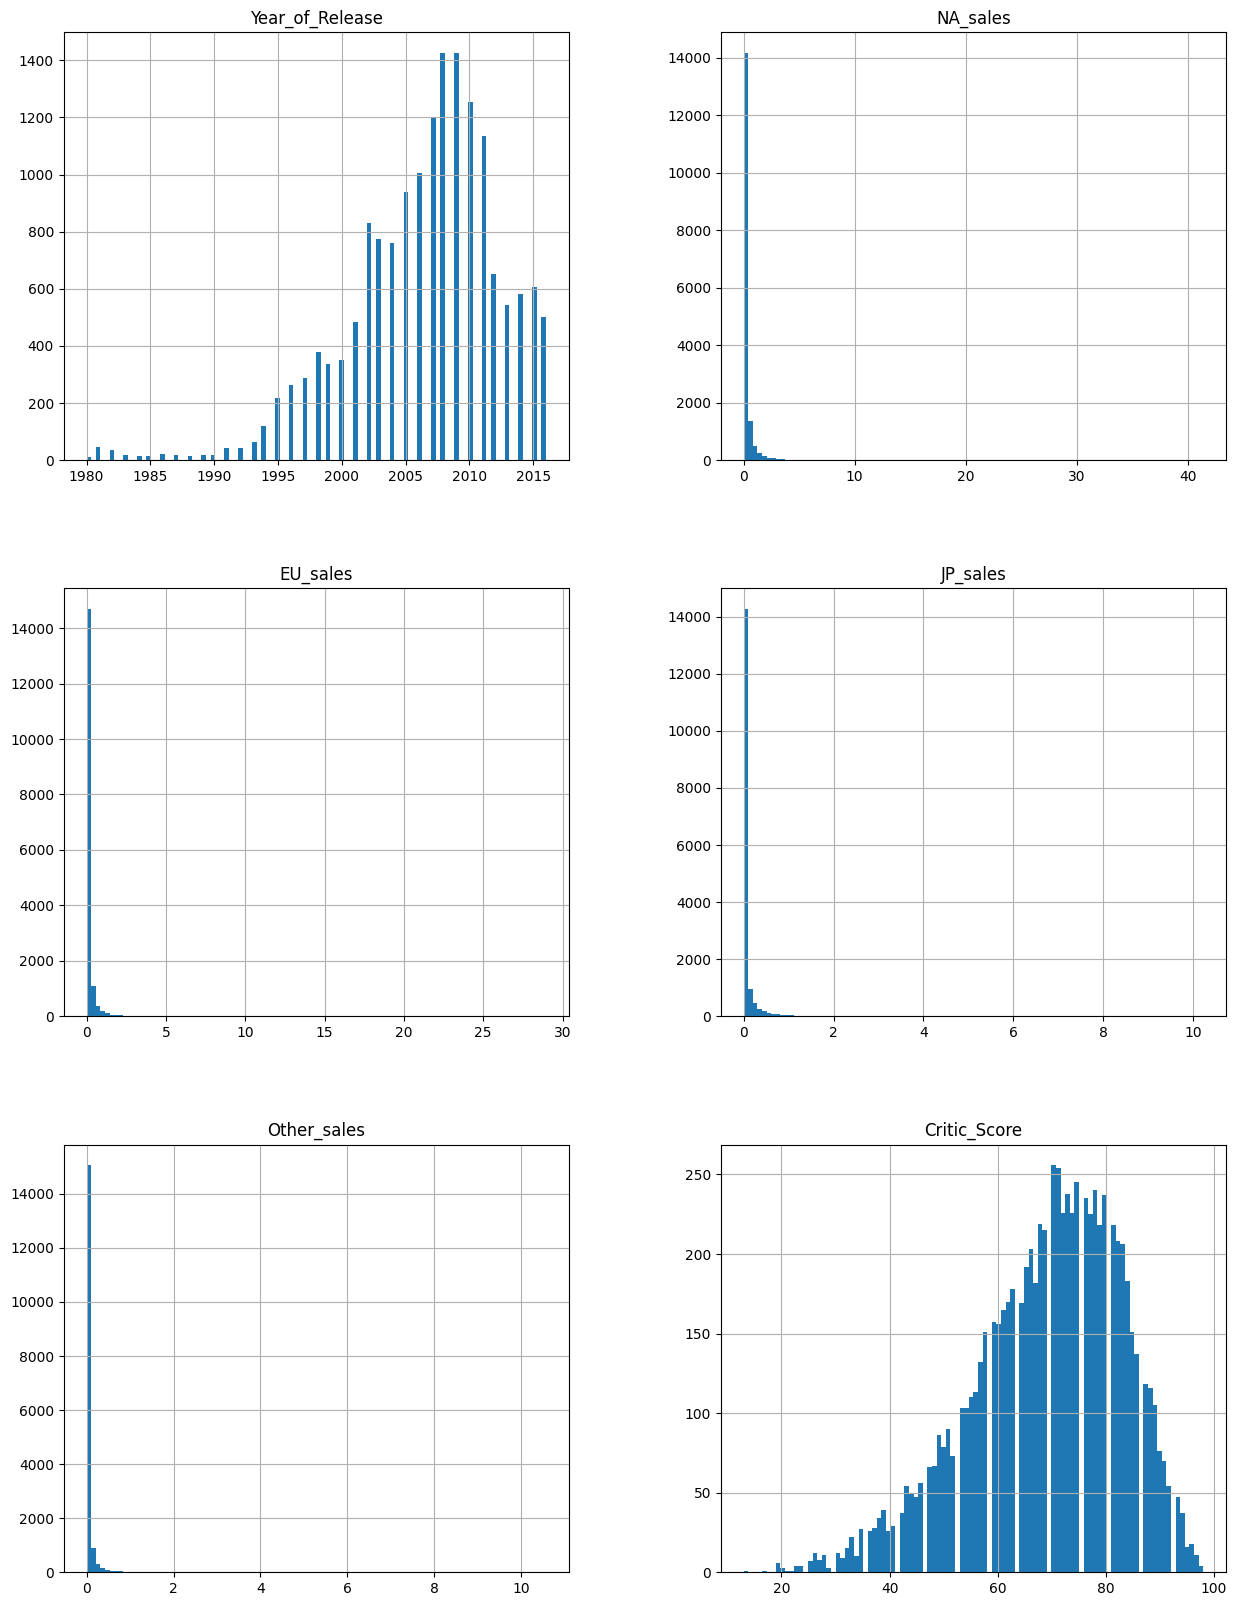

In [6]:
# Матрица гистограмм
data.hist(figsize=(15, 20), bins=100);

**Вывод**
<br>Столбцы `Name`, `Year_of_Release`, `Genre` имеют небольшое количество пропусков, а `Critic_Score`, `User_Score` и `Rating` - значительное. Причина пропусков в первом случае - чисто технические, во втором - возможна комбинация технических и человеческих факторов, т.к. оценивание - процесс долгий и сложный.
<br>По типам данных - имеет смысл заменить у `Year_of_Release` на целочисленный, `User_Score` - на float.

### Предобработка данных

In [7]:
# Приводим имена столбцов к нижнему регистру
data.columns = data.columns.str.lower()
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбце `year_of_release` менее 300 строк с пустыми значениями. С ними преобразование в целочисленный тип не пойдет. Присмотримся к ним, с целью определения тактики заполнения пустых значений:

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


В принципе, соседние столбцы содержат подсказки, по которым можно понять какой диапазон лет (по игровой платформе) или даже конкретный год (по названию) можно подставить на место пустого значения. Но насколько это нужно? Ведь нам прежде всего нужны данные за 2016 г. для анализа. Проверяем, есть ли в названиях игр какие-то указания на это:

In [9]:
len(data[(data['year_of_release'].isna()) & (('2016'or'2017') in data['name'])])

0

Прямых указаний на то, что там есть актуальные данные - нет. Поэтому просто выкинем их:

In [10]:
data = data.dropna(subset=['year_of_release'])

In [11]:
# Приведем столбец 'year_of_release' к типу int
data['year_of_release'] = data['year_of_release'].astype(int)

Аналогично со столбцом `name`:

In [12]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 записи за 1993 год - тоже удаляем:

In [13]:
data = data.dropna(subset=['name'])
print('Отбросили строк:', (16715 - data.shape[0]))
print('или в % от исходного датафрейма:', (100 - data.shape[0] / 167.15))

Отбросили строк: 271
или в % от исходного датафрейма: 1.6212982351181608


Столбец `user_score` почему-то имеет не числовой тип данных, а строковый. Изучим уникальные значения столбца:

In [14]:
display(data['user_score'].sort_values(ascending=True).unique())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Выявилось аномальное значение: `tbd` - "to be determined". Данные в процессе уточнения. Такие данные также неинформативны для нас, вполне можно заменить их на пустые значения с помощью параметра `errors='coerce'` функции `to_numeric`:

In [15]:
# Приведем столбец 'user_score' к типу float
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
# Проверяем корректность преобразования столбца 'user_score'
display(data['user_score'].sort_values(ascending=True).unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец world_sales:

In [17]:
data['world_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Взглянем на полученный датафрейм:

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16444.0,2006.486256,5.875525,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16444.0,0.264012,0.818378,0.0,0.00,0.08,0.24,41.36
eu_sales,16444.0,0.145930,0.506716,0.0,0.00,0.02,0.11,28.96
jp_sales,16444.0,0.078487,0.311100,0.0,0.00,0.00,0.04,10.22
other_sales,16444.0,0.047594,0.188005,0.0,0.00,0.01,0.03,10.57
critic_score,7983.0,68.994363,13.920060,13.0,60.00,71.00,79.00,98.00
user_score,7463.0,7.126330,1.499447,0.0,6.40,7.50,8.20,9.70
world_sales,16444.0,0.536023,1.558786,0.0,0.06,0.17,0.47,82.54


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  world_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Вывод**
- Привели названия столбцов к нижнему регистру;
- Отбросили строк: 271 или 1.62% от исходного датафрейма;
- Заменили тип данных у 'year_of_release' на целочисленный (и обработали аномальные значения), 'user_score' - на float;
- Добавили столбец 'world_sales', содержащий сумму продаж по всем регионам.

### Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

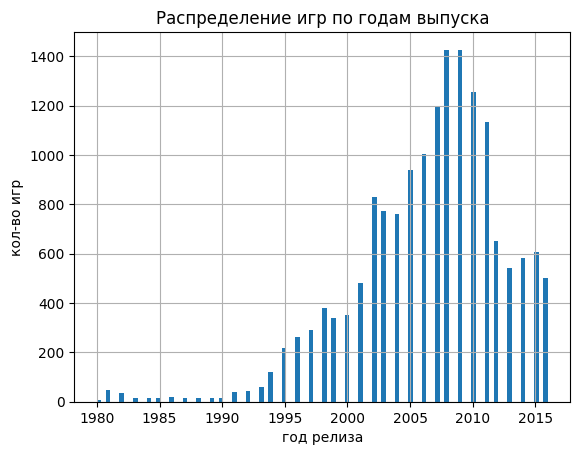

In [20]:
# Cтроим гистограмму по годам выпуска игр
data['year_of_release'].hist(bins=100)
plt.title('Распределение игр по годам выпуска')
plt.xlabel('год релиза')
plt.ylabel('кол-во игр');

Видно, что с начала 1990-х количество выпускаемых игр резко росло до конца 2000-х, затем еще более резко скорректировалось и сейчас более-менее стабильно колеблется около 500-700 релизов/год. Очевидно, данные старше 2013 г. будут совсем неактуальны для построения прогнозов в текущей ситуации, т.к. игровой рынок кардинально поменялся с тех пор.

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
# Выбираем платформы с наибольшими суммарными продажами
data_by_platform = data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
data_by_platform = data_by_platform.sort_values(by='world_sales', ascending=False)
display(data_by_platform.head(10))

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


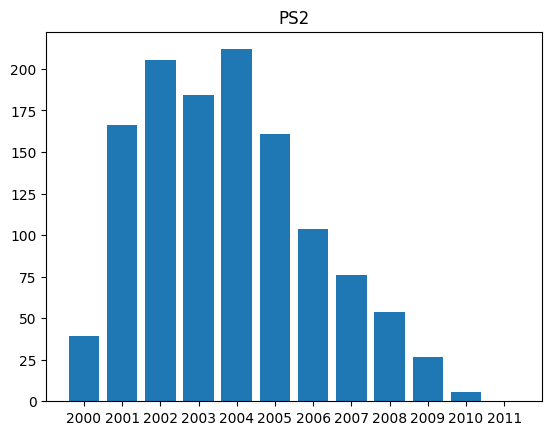

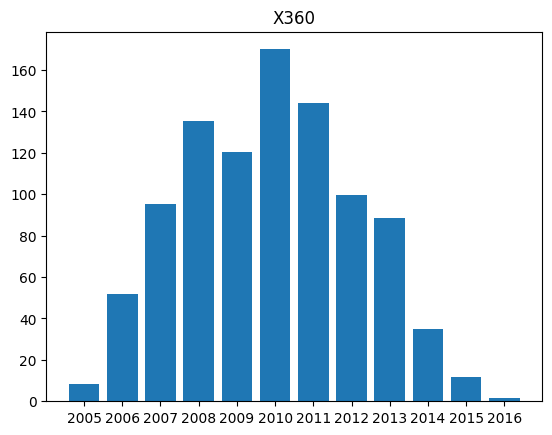

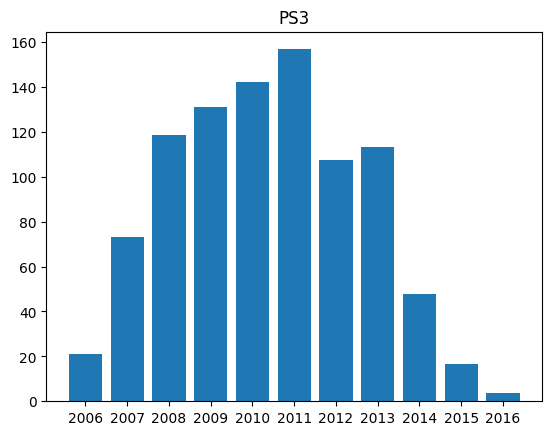

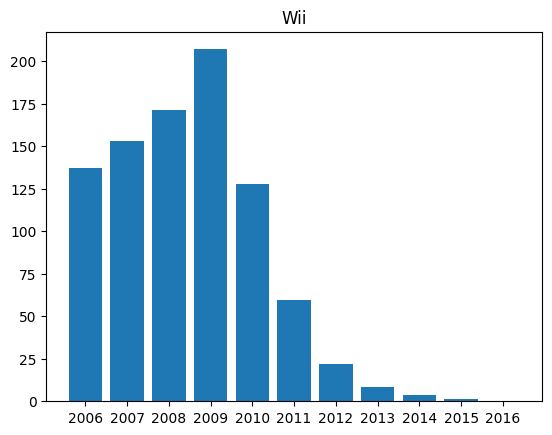

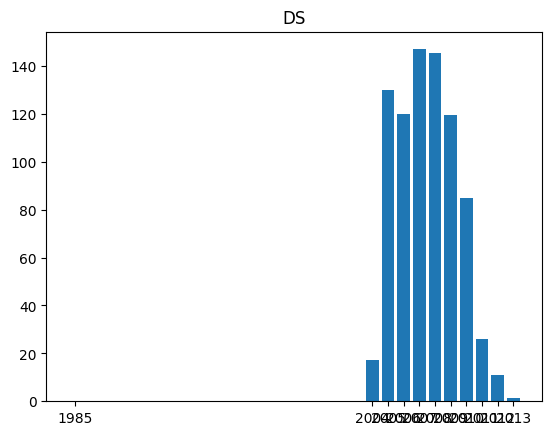

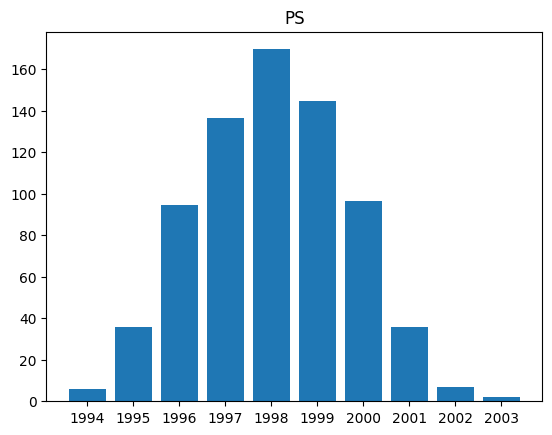

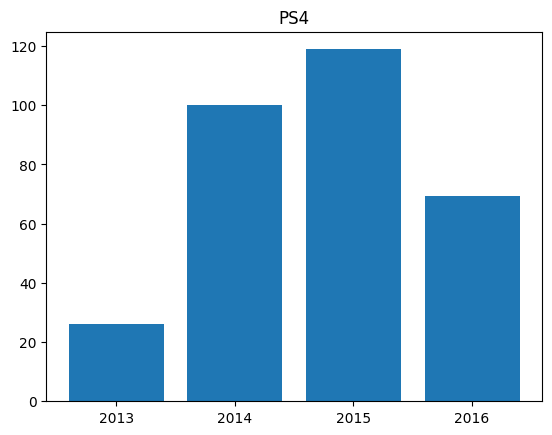

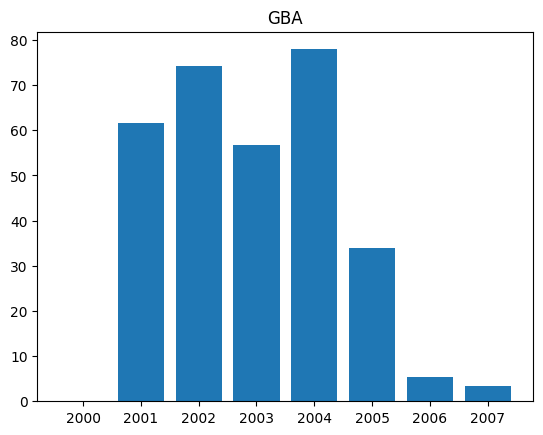

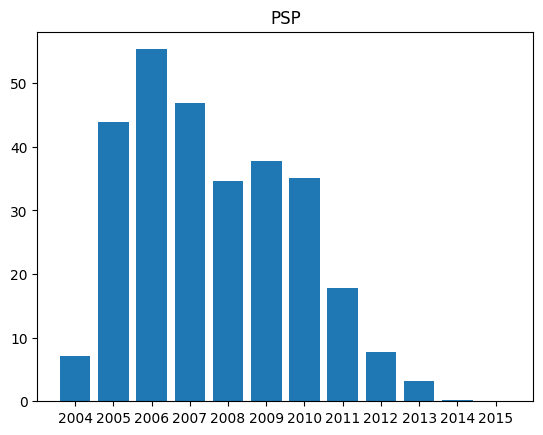

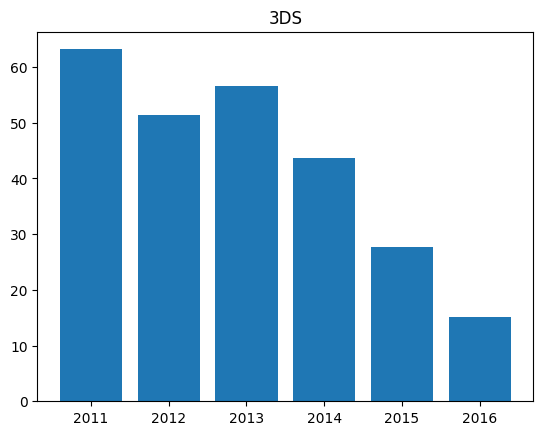

In [22]:
# Теперь строим для них гистограммы суммарных продаж по годам
for value in data_by_platform.index[:10]:
    data_filtered = data.query('platform == @value').pivot_table(
        index='year_of_release', values='world_sales', aggfunc='sum')
    fig, ax = plt.subplots()
    plt.bar(data_filtered.index, data_filtered['world_sales']);
    plt.xticks(data_filtered.index, data_filtered.index)
    ax.set_title(value)
    plt.show()

Характерный срок существования игровой платформы - около 10 лет

- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Таким образом, данные старше 10 лет нам точно не понадобятся для построения прогноза, т.к. это - характерное время существования игровой платформы. Разумно также отсечь данные старше 2013 г., т.к. игровой рынок кардинально поменялся с тех пор.

In [23]:
#отсекаем старые данные
data = data.query('year_of_release >= 2013')

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [24]:
# Выбираем платформы с наибольшими суммарными продажами
data_by_platform = data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
data_by_platform = data_by_platform.sort_values(by='world_sales', ascending=False)
display(data_by_platform.head(10))

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


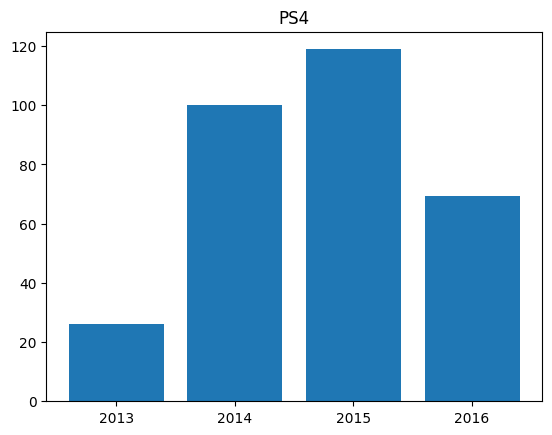

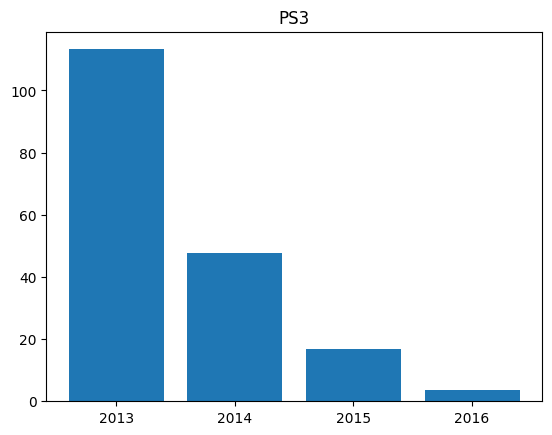

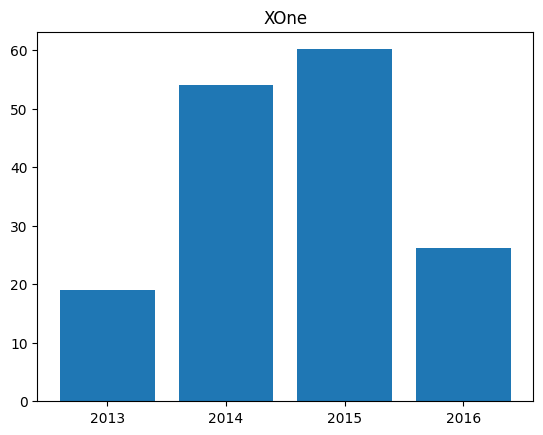

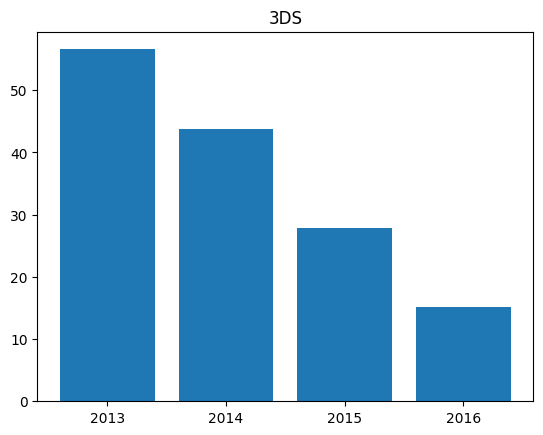

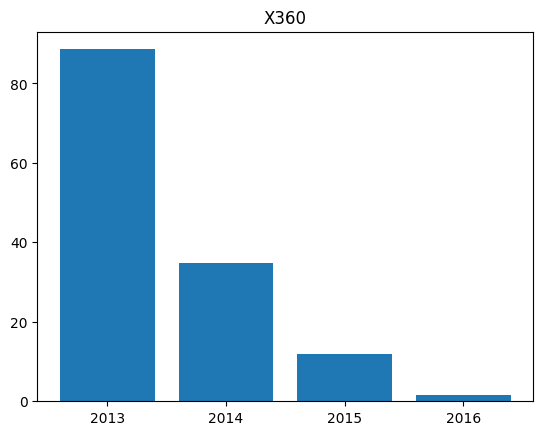

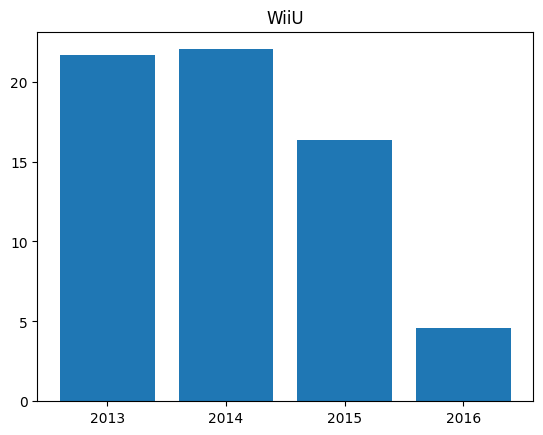

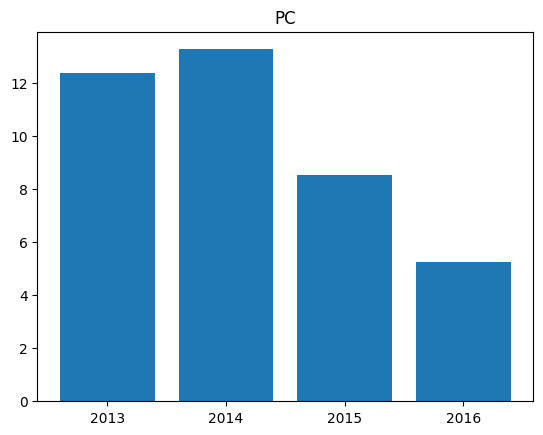

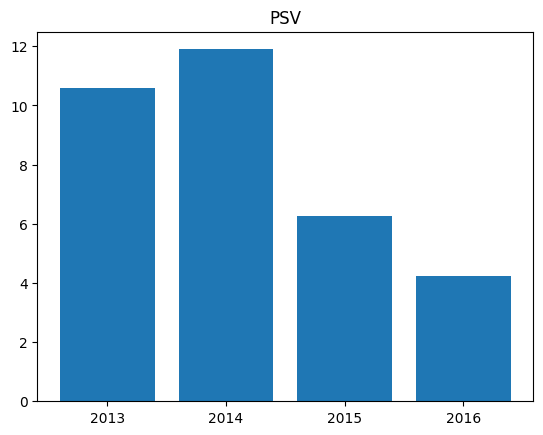

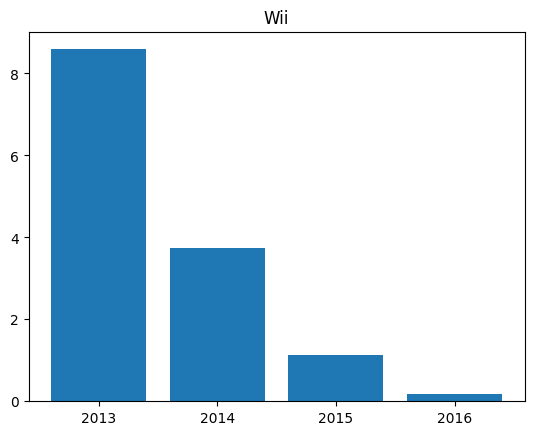

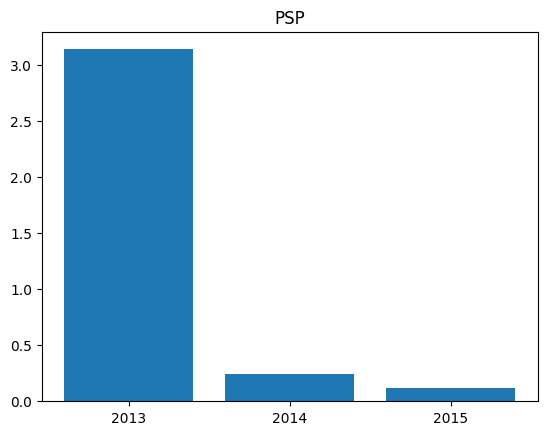

In [25]:
# Теперь строим для них гистограммы суммарных продаж по годам
for value in data_by_platform.index[:10]:
    data_filtered = data.query('platform == @value').pivot_table(
        index='year_of_release', values='world_sales', aggfunc='sum')
    fig, ax = plt.subplots()
    plt.bar(data_filtered.index, data_filtered['world_sales']);
    plt.xticks(data_filtered.index, data_filtered.index)
    ax.set_title(value)
    plt.show()

Все лидеры продаж из топ-10 показывают снижение общих продаж. Наибольшие валовые значения продаж можно ожидать у PS4 и XOne.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

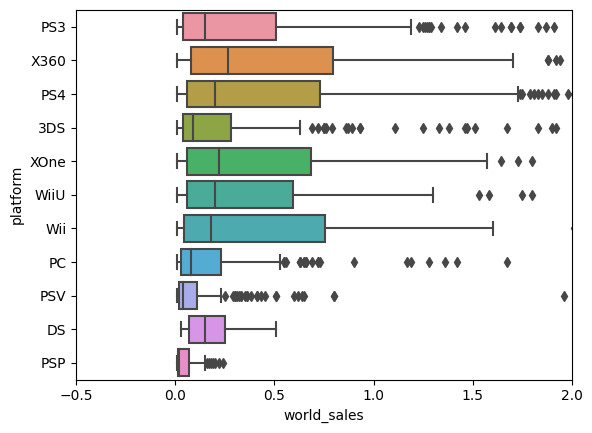

In [26]:
# Строим "ящики с усами" для первой дюжины платформ
for value in data_by_platform.index[:12]:
    sns.boxplot(x=data.query('platform == @value')['world_sales'], y=data['platform'])
plt.xlim(-0.5, 2);

Наилучшие показатели продаж наблюдаются у платформ X360, PS4, XOne, WiiU, Wii

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Рассмотрим данные для PS4:

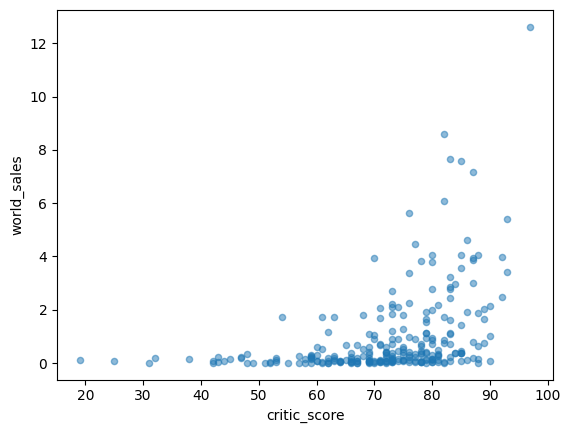

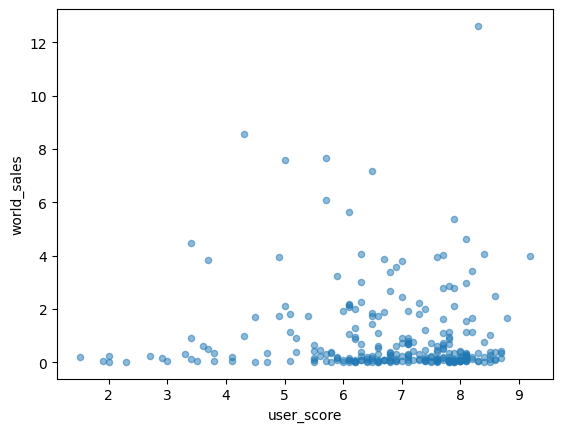

In [27]:
#делаем срез по нужным данным и строим диаграммы рассеяния
data_ps4 = data.query('platform == "PS4"')
data_ps4.plot(x='critic_score', y='world_sales', kind='scatter', alpha=0.5);
data_ps4.plot(x='user_score', y='world_sales', kind='scatter', alpha=0.5);

In [28]:
#считаем коэффициенты корреляции Пирсона
data_ps4['critic_score'].corr(data_ps4['world_sales'])

0.4065679020617813

In [29]:
data_ps4['user_score'].corr(data_ps4['world_sales'])

-0.031957110204556466

У оценок критиков наблюдается слабая положительная корреляция с продажами. В случае оценок пользователей корреляции не наблюдается.

- Соотнесите выводы с продажами игр на других платформах.

Рассмотрим для сравнения те же данные для XOne:

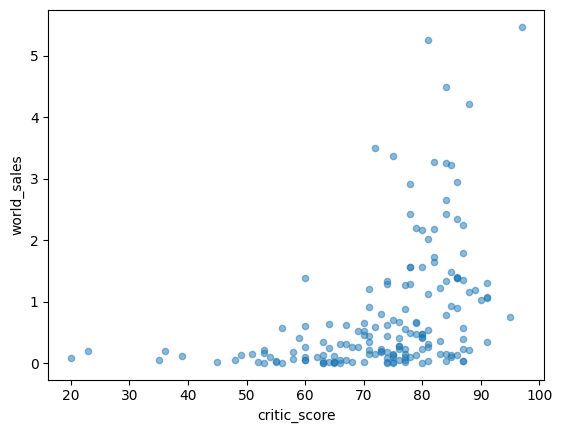

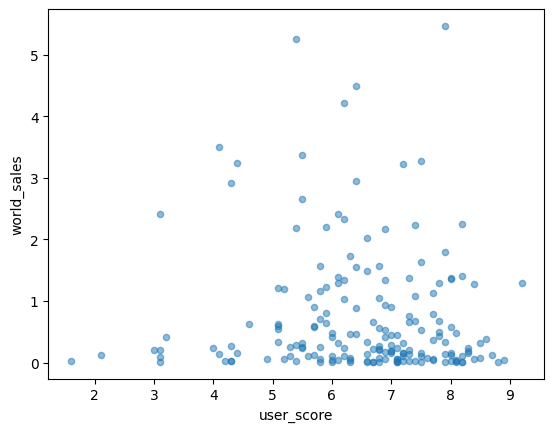

In [30]:
#делаем срез по нужным данным и строим диаграммы рассеяния
data_xone = data.query('platform == "XOne"')
data_xone.plot(x='critic_score', y='world_sales', kind='scatter', alpha=0.5);
data_xone.plot(x='user_score', y='world_sales', kind='scatter', alpha=0.5);

In [31]:
#считаем коэффициенты корреляции Пирсона
data_xone['critic_score'].corr(data_xone['world_sales'])

0.41699832800840153

In [32]:
data_xone['user_score'].corr(data_xone['world_sales'])

-0.0689250532827942

Практически тот же результат. Теперь суммарно по всем платформам:

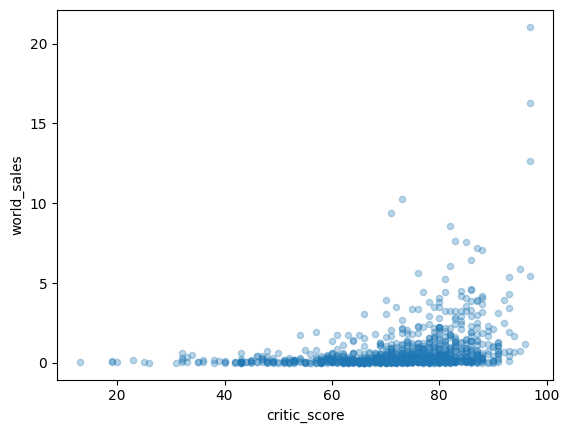

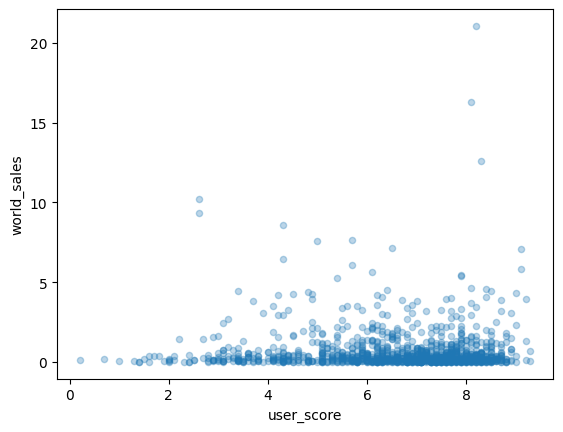

In [33]:
#строим диаграммы рассеяния
data.plot(x='critic_score', y='world_sales', kind='scatter', alpha=0.3);
data.plot(x='user_score', y='world_sales', kind='scatter', alpha=0.3);

In [34]:
#считаем коэффициенты корреляции Пирсона
data['critic_score'].corr(data['world_sales'])

0.3136995151027369

In [35]:
data['user_score'].corr(data['world_sales'])

-0.002607813354598258

И по всему датафрейму мы получаем аналогичный результат

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

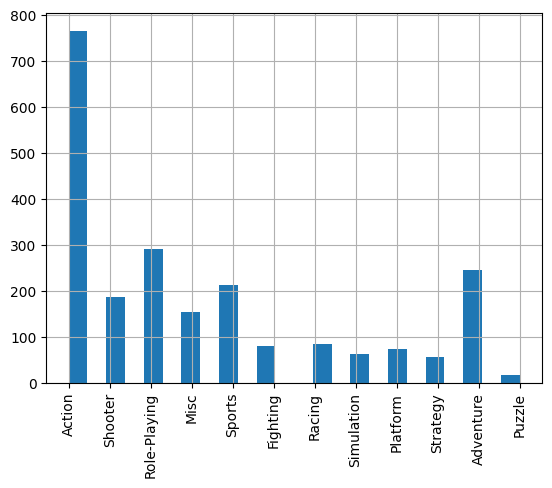

In [36]:
#строим гистограмму по частотности жанров
data['genre'].hist(bins=24, xrot=90);

Видно около дюжины жанров, самый популярный - Action, затем - RPG и Adventure, наименее популярный - Puzzle

In [37]:
#теперь рассмотрим продажи по жанрам
data_by_genre = data.pivot_table(index='genre', values='world_sales', aggfunc='median')
data_by_genre = data_by_genre.sort_values(by='world_sales', ascending=False)
display(data_by_genre)

,world_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


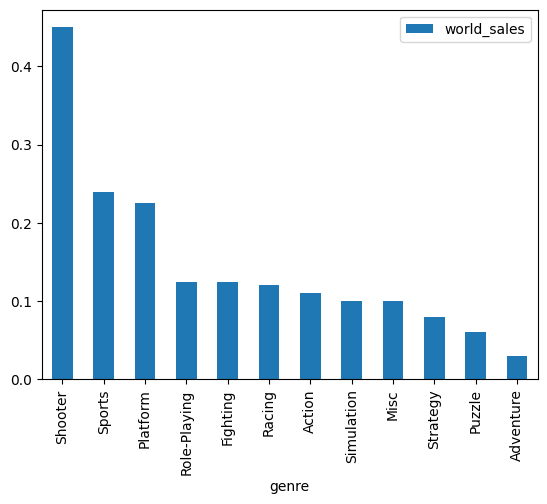

In [38]:
data_by_genre.plot(kind='bar');

Среди жанров выделяются как лидеры по усредненным продажам (Shooter, Sports и Platform), так и явные аутсайдеры (Adventure и Puzzle)

**Вывод**
- C начала 1990-х количество выпускаемых игр резко росло до конца 2000-х, затем еще более резко скорректировалось и после 2012 г. стабильно колеблется около 500-700 релизов/год;
- Характерный срок существования игровой платформы - около 10 лет;
- Для прогнозирования разумно использовать данные 2013-2016 гг.;
- Платформы-лидеры продаж: PS4, PS3, XOne. Наилучшие показатели продаж наблюдаются у платформ X360, PS4, XOne, WiiU, Wii;
- Все лидеры продаж из топ-10 показывают снижение общих продаж в последние годы. Наибольшие валовые значения продаж можно ожидать у PS4 и XOne;
- У оценок критиков наблюдается слабая положительная корреляция с продажами. В случае оценок пользователей корреляции не наблюдается;
- Среди жанров выделяются как лидеры по усредненным продажам (Shooter, Sports и Platform), так и явные аутсайдеры (Adventure и Puzzle).

### Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Опишите различия в долях продаж.

In [39]:
#выбираем платформы с наибольшими суммарными продажами (Северная Америка)
data_by_platform_na = data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_by_platform_na = data_by_platform_na.sort_values(by='na_sales', ascending=False)
display(data_by_platform_na.head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [40]:
#выбираем платформы с наибольшими суммарными продажами (Европа)
data_by_platform_eu = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_by_platform_eu = data_by_platform_eu.sort_values(by='eu_sales', ascending=False)
display(data_by_platform_eu.head())

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [41]:
#выбираем платформы с наибольшими суммарными продажами (Япония)
data_by_platform_jp = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_by_platform_jp = data_by_platform_jp.sort_values(by='jp_sales', ascending=False)
display(data_by_platform_jp.head())

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


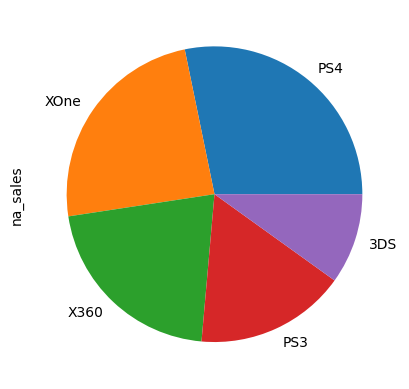

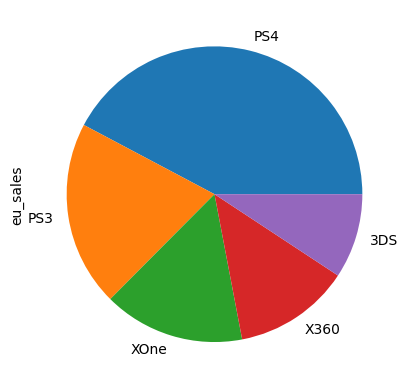

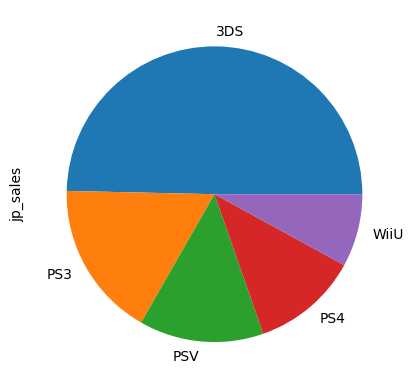

In [42]:
#строим круговые диаграммы для лидеров каждого региона
data_by_platform_na.iloc[:5].plot(kind='pie', y='na_sales', legend=False);
data_by_platform_eu.iloc[:5].plot(kind='pie', y='eu_sales', legend=False);
data_by_platform_jp.iloc[:5].plot(kind='pie', y='jp_sales', legend=False);

В Северной Америке наиболее популярные игровые платформы - PS4 и XOne, они занимают чуть меньше четверти рынка каждая. В Европе PS4 занимает добрую треть всего объема продаж, являясь безоговорочным лидером. XBox (XOne и X360) тут сильно уступает PlayStation (PS4 и PS3). Но в Японии ситация отличается радикально: там лидером продаж является 3DS, занимая чуть менее половины продаж. А PlayStation (представленная еще и PS-Vita) суммарно занимает около 40% рынка.

- Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.

In [43]:
# Выбираем наиболее популярные жанры (Северная Америка)
data_by_genre_na = data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
data_by_genre_na = data_by_genre_na.sort_values(by='na_sales', ascending=False)
display(data_by_genre_na.head())

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [44]:
# Выбираем наиболее популярные жанры (Европа)
data_by_genre_eu = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
data_by_genre_eu = data_by_genre_eu.sort_values(by='eu_sales', ascending=False)
display(data_by_genre_eu.head())

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [45]:
# Выбираем наиболее популярные жанры (Япония)
data_by_genre_jp = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
data_by_genre_jp = data_by_genre_jp.sort_values(by='jp_sales', ascending=False)
display(data_by_genre_jp.head())

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


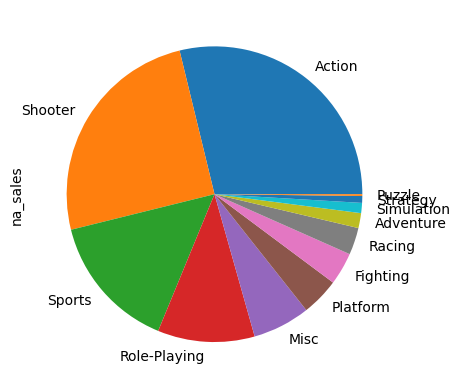

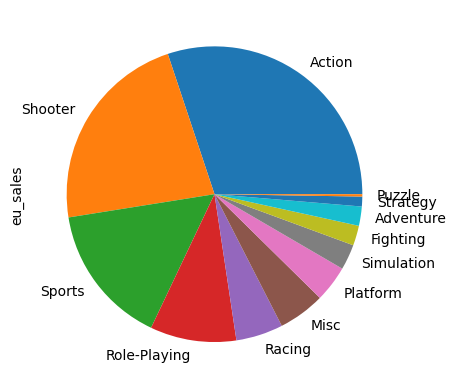

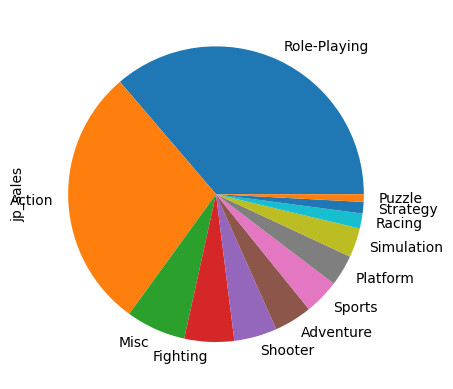

In [46]:
# Строим круговые диаграммы для каждого региона
data_by_genre_na.plot(kind='pie', y='na_sales', legend=False);
data_by_genre_eu.plot(kind='pie', y='eu_sales', legend=False);
data_by_genre_jp.plot(kind='pie', y='jp_sales', legend=False);

По жанрам наблюдается аналогичная картина: разница между Северной Америкой и Европой небольшая. Первые четыре жанра по убыванию популярности: Action, Shooter, Sports и Role-Playing имеют похожие доли рынка. Единственное отличие, что в Европе больше любят гонки - жанр Racing оказался там на пятом месте, в отличие от американского Misc. А вот в Японии больше всего любят RPG (треть рынка), Action почти догоняет его по показателям продаж, а все остальные жанры - слабо представлены.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
#делаем сводную таблицу по рейтингам и суммарным региональным продажам
data_by_rating = data.pivot_table(index='rating', values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum'
                                 ).sort_values(by='eu_sales', ascending=False)
display(data_by_rating)

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


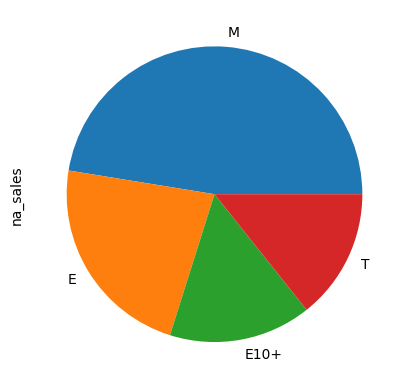

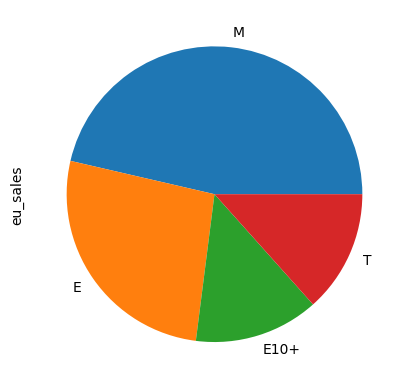

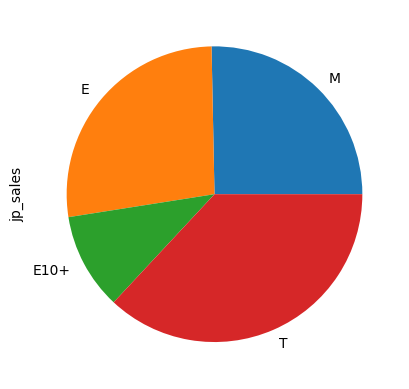

In [48]:
#визуализируем региональные различия в виде круговых диаграмм:
data_by_rating.plot(kind='pie', y='na_sales', legend=False);
data_by_rating.plot(kind='pie', y='eu_sales', legend=False);
data_by_rating.plot(kind='pie', y='jp_sales', legend=False);

Региональные отличия в продажах в зависимости от рейтинга ESRB для Европы и Северной Америки незначительны: M - чуть менее половины продаж, далее E и Е10+. В Японии предпочитают (около 1/3 продаж) игры для подростков (Т) в ущерб продажам игр для взрослой аудитории (М, менее четверти рынка).

**Вывод**
- В Северной Америке наиболее популярные игровые платформы - PS4 и XOne, они занимают чуть меньше четверти рынка каждая. В Европе PS4 занимает добрую треть всего объема продаж, являясь безоговорочным лидером. XBox (XOne и X360) тут сильно уступает PlayStation (PS4 и PS3). Но в Японии ситация отличается радикально: там лидером продаж является 3DS, занимая чуть менее половины продаж. А PlayStation (представленная еще и PS-Vita) суммарно занимает около 40% рынка;
- По жанрам наблюдается аналогичная картина: разница между Северной Америкой и Европой небольшая. Первые четыре жанра по убыванию популярности: Action, Shooter, Sports и Role-Playing имеют похожие доли рынка. Единственное отличие, что в Европе больше любят гонки - жанр Racing оказался там на пятом месте, в отличие от американского Misc. А вот в Японии больше всего любят RPG (треть рынка), Action почти догоняет его по показателям продаж, а все остальные жанры - слабо представлены;
- Региональные отличия в продажах в зависимости от рейтинга ESRB для Европы и Северной Америки незначительны: M - чуть менее половины продаж, далее E и Е10+. В Японии предпочитают (около 1/3 продаж) игры для подростков (Т) в ущерб продажам игр для взрослой аудитории (М, менее четверти рынка).

### Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезы и зададим пороговый уровень значимости:
<br>H₀ Средние значения пользовательских рейтингов для платформ Xbox One и PC совпадают;
<br>H₁ Средние значения пользовательских рейтингов для платформ Xbox One и PC не совпадают;
<br>alpha = 0.05

In [49]:
# Задаем совокупности и критерий значимости
score_xone = data.query('(platform =="XOne") and not (user_score.isna())')['user_score']
score_pc = data.query('(platform =="PC") and not (user_score.isna())')['user_score']
alpha = .05

# Проводим статистический тест на равенство средних двух совокупностей, дисперсии не совпадают
results = st.ttest_ind(score_xone, score_pc, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод**
<br>Средние значения пользовательских рейтингов для платформ Xbox One и PC совпадают

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы и зададим пороговый уровень значимости:
<br>H₀ Средние пользовательские рейтинги жанров Action и Sports совпадают;
<br>H₁ Средние пользовательские рейтинги жанров Action и Sports не совпадают;
<br>alpha = 0.05

In [50]:
# Задаем совокупности и критерий значимости
score_action = data.query('(genre =="Action") and not (user_score.isna())')['user_score']
score_sports = data.query('(genre =="Sports") and not (user_score.isna())')['user_score']
alpha = .05

# Проводим статистический тест на равенство средних двух совокупностей, дисперсии не совпадают
results = st.ttest_ind(score_action, score_sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


**Вывод**
<br>Средние пользовательские рейтинги жанров Action и Sports не совпадают

### Общий вывод

- Для прогнозирования продаж на 2017 г. разумно использовать данные 2013-2016 гг.;
- Платформы-лидеры продаж: PS4, PS3, XOne. Наилучшие показатели продаж наблюдаются у платформ X360, PS4, XOne, WiiU, Wii;
- Все лидеры продаж из топ-10 показывают снижение общих продаж в последние годы. Наибольшие валовые значения продаж можно ожидать у PS4 и XOne;
- У оценок критиков наблюдается слабая положительная корреляция с продажами;
- Существуют серьезные региональные различия в продажах для Европы, Америки и Японии по игровым платформам, жанрам и даже возрастному рейтингу игр;
- Средние значения пользовательских рейтингов для платформ Xbox One и PC совпадают;
- Средние пользовательские рейтинги жанров Action и Sports не совпадают.